Linea Regression

In [24]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=100, optimizer="batch", regularization=None, lambda_=0.01):
        """
        Initialize Linear Regression model.

        :param learning_rate: Step size for gradient descent.
        :param epochs: Number of iterations for training.
        :param optimizer: Type of optimizer ("batch", "sgd", "mini-batch").
        :param regularization: Type of regularization ("l1", "l2", or None).
        :param lambda_: Regularization strength.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.optimizer = optimizer
        self.regularization = regularization 
        self.lambda_ = lambda_
        self.w = None
        self.b = None

    def initialize_weights(self, n_features):
        """Initialize weights and bias."""
        self.w = np.random.randn(n_features)  # Initialize weights (Hint: Should match feature count)
        self.b = 0.2     # Initialize bias (Hint: Scalar)

    def compute_loss(self, X, y):
        """Compute Mean Squared Error (MSE) loss."""
        m = X.shape[0]
        y_pred = self.predict(X)  # Call the prediction function
        mse = np.average(np.square(y - y_pred))       # Compute MSE (Hint: Mean of squared differences)

        # Add Regularization
        if self.regularization == "l2":  # Ridge Regression
            mse += self.lambda_ * np.square(self.w)
        elif self.regularization == "l1":  # Lasso Regression
            mse += self.lambda_ * np.abs(self.w)

        return mse

    def compute_gradient(self, X, y):
        """Compute gradients for weight and bias."""
        m = X.shape[0]
        y_pred = self.predict(X)  # Get predictions

        # Compute gradients
        dw = -2/m * np.dot(X.T, (y - y_pred))  # Fill in the missing part
        db = -2/m * np.sum(y - y_pred) # Fill in the missing part

        # Add Regularization Gradients
        if self.regularization == "l2":  # L2 (Ridge)
            dw += self.lambda_ * 2 *(self.w)
        elif self.regularization == "l1":  # L1 (Lasso)
            dw += self.lambda_ * np.sign(self.w)

        return dw, db

    def gradient_descent(self, X, y):
        loss_history = []
        for _ in range(self.epochs):
            dw, db = self.compute_gradient(X, y)
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
            loss_history.append(self.compute_loss(X, y))  # Track loss over time
        return loss_history


    def train(self, X, y):
        self.initialize_weights(n_features=X.shape[1])

        if self.optimizer == "batch":
            loss_history = self.gradient_descent(X, y)
        else:
            raise ValueError(f"Optimizer '{self.optimizer}' not implemented yet.")

        return loss_history  # Return loss history for visualization


    def predict(self, X):
        """Predict output for given input X."""
        return np.dot(X, self.w) + self.b  # Complete the prediction formula


In [10]:
import matplotlib.pyplot as plt

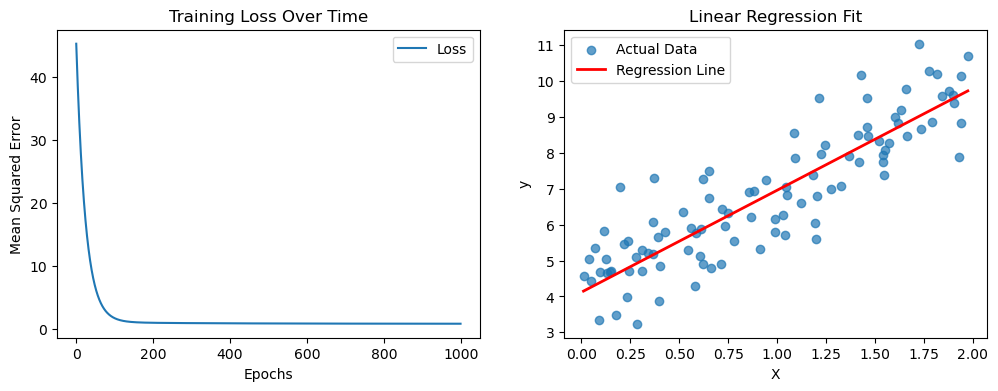

Weights: [2.84375704], Bias: 4.116016684170404


In [38]:
# Generate Synthetic Data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)

# Train the model
model = LinearRegression(learning_rate=0.005, epochs=1000, optimizer="batch", regularization="l2")

loss_history = model.train(X, y)

# Predictions
y_pred = model.predict(X)

# Plotting Results
plt.figure(figsize=(12, 4))

# Loss vs. Epochs
plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss Over Time")
plt.legend()

# Sort X for smooth plotting
sorted_indices = np.argsort(X[:, 0])  # Get sorted indices
X_sorted = X[sorted_indices]  # Sort X values
y_pred_sorted = y_pred[sorted_indices]  # Sort corresponding predictions

plt.subplot(1, 2, 2)
plt.scatter(X, y, label="Actual Data", alpha=0.7)
plt.plot(X_sorted, y_pred_sorted, color="red", label="Regression Line", linewidth=2)  # Sorted line
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()



plt.show()

# Print Final Weights
print(f"Weights: {model.w}, Bias: {model.b}")
